In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Read the data
df = pd.read_csv('Reviews.csv', nrows=100)
# Look at the top 5 rows of the data
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [2]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [3]:
pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/626.3 kB 393.8 kB/s eta 0:00:02
   --- ----------------------------------- 61.4/626.3 kB 550.5 kB/s eta 0:00:02
   --- ----------------------------------- 61.4/626.3 kB 550.5 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/626.3 kB 469.7 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/626.3 kB 469.7 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/626.3 kB 469.7 kB/s eta 0:00:02
   --------- ---------------------------- 153.6/626.3 kB 399.3 kB/s eta 0:00:02
   --------- ---------------------------- 153.6/626.3 kB 399.3 kB/s eta 0:00:02
   ------

In [6]:
import nltk

In [7]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [13]:
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]','')
# Removal of stop words
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
# Spelling correction
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))
# Lemmatization
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Text.head(5)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5356\2817037263.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^\w\s]','')


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\DELL/nltk_data'
    - 'C:\\Users\\DELL\\anaconda3\\anaconda\\nltk_data'
    - 'C:\\Users\\DELL\\anaconda3\\anaconda\\share\\nltk_data'
    - 'C:\\Users\\DELL\\anaconda3\\anaconda\\lib\\nltk_data'
    - 'C:\\Users\\DELL\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [11]:
reviews=df
reviews.dropna(inplace=True)


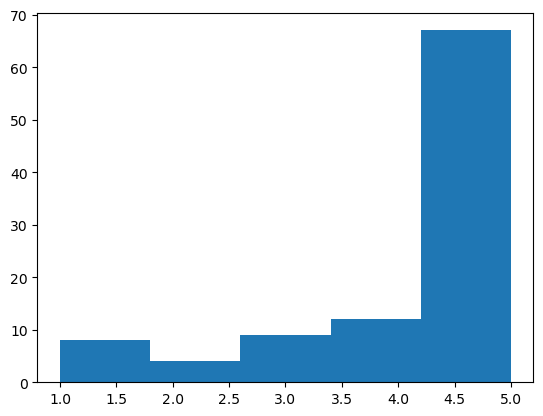

Score
1     8
2     4
3     9
4    12
5    67
Name: Id, dtype: int64


In [12]:
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [14]:
score_1 = reviews[reviews['Score'] == 1].sample(n=4)
score_2 = reviews[reviews['Score'] == 2].sample(n=4)
score_3 = reviews[reviews['Score'] == 3].sample(n=4)
score_4 = reviews[reviews['Score'] == 4].sample(n=4)
score_5 = reviews[reviews['Score'] == 5].sample(n=4)
# Here we recreate a 'balanced' dataset.
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)
# Printing count by 'Score' to check dataset is now balanced.
print(reviews_sample.groupby('Score').count().Id)

Score
1    4
2    4
3    4
4    4
5    4
Name: Id, dtype: int64


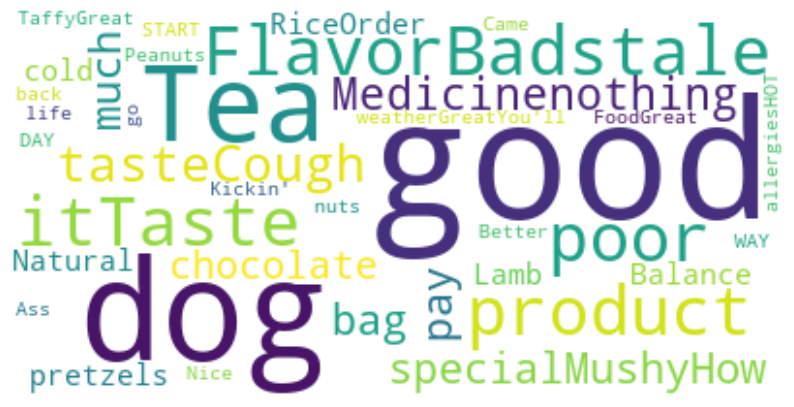

In [15]:
# Let's build a word cloud looking at the 'Summary' text
from wordcloud import WordCloud
# Wordcloud function's input needs to be a single string of text.
# Here I'm concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str = reviews_sample.Summary.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or 5) Reviews.
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5]) ]
# Transform to single string
negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

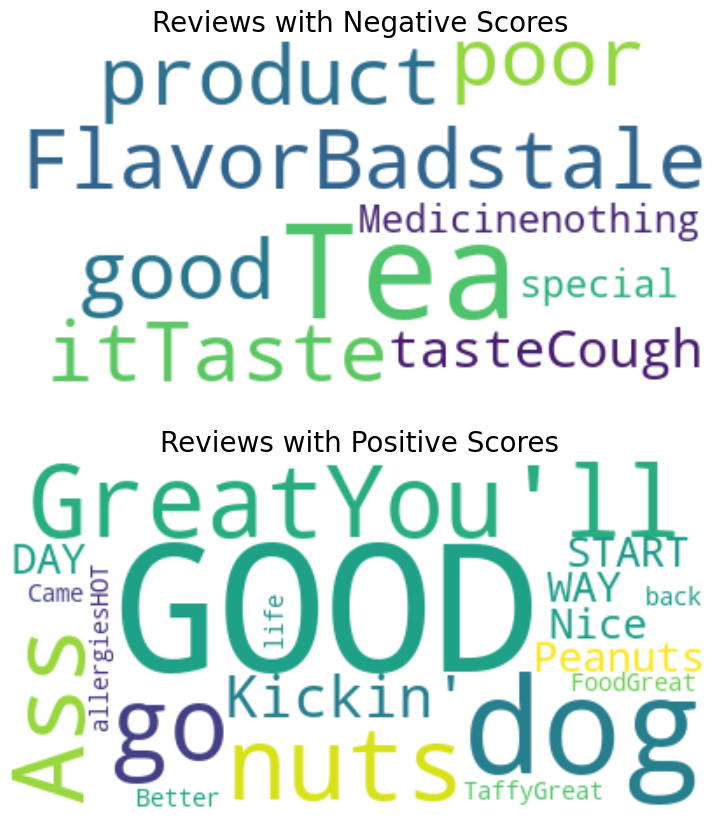

In [17]:
# Create wordclouds
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

In [18]:
pip install vaderSentiment


  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --------- ----------------------------- 30.7/126.0 kB 660.6 kB/s eta 0:00:01
   ------------ -------------------------- 41.0/126.0 kB 653.6 kB/s eta 0:00:01
   ---------------------- ---------------- 71.7/126.0 kB 563.7 kB/s eta 0:00:01
   ---------------------------- ---------- 92.2/126.0 kB 525.1 kB/s eta 0:00:01
   ---------------------------- ---------- 92.2/126.0 kB 525.1 kB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 389.6 kB/s eta 0:00:00


In [19]:
import seaborn as sns
plt.style.use('fivethirtyeight')
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['Text']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)

In [20]:
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head(5)

,neg,neu,pos,compound
0,0.000,0.711,0.289,0.9441
1,0.138,0.862,0.000,-0.5664
2,0.087,0.767,0.146,0.8138
3,0.000,0.932,0.068,0.4404
4,0.000,0.599,0.401,0.9468


In [21]:
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...,0.000,0.711,0.289,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...,0.138,0.862,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...,0.087,0.767,0.146,0.8138


In [22]:
# Convert scores into positive and negetive sentiments using some threshold
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive', 'Negative')
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...,0.000,0.711,0.289,0.9441,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...,0.138,0.862,0.000,-0.5664,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...,0.087,0.767,0.146,0.8138,Positive


Positive    91
Negative     9
Name: Sentiment, dtype: int64


<Axes: >

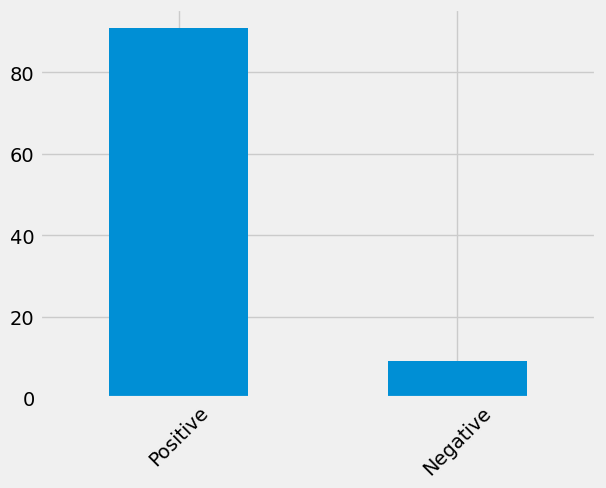

In [23]:
result=df_c['Sentiment'].value_counts()
print(result)
result.plot(kind='bar', rot=45)